In [1]:
# 14년 ~ 19년 주간 박스오피스 크롤링
import pandas as pd
import datetime
import requests

key1 = ''

def crawl_data(start_date, end_date, keys =key1) :
    yearWeekTime_list = []
    final_list = []
    url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchWeeklyBoxOfficeList.json'
    # 주간데이터이기 때문에 월~일까지의 데이터 기록이 같으므로 주말만 date_range로넣음
    date_range = pd.date_range(start_date, end_date,freq='W')
    
    # 마지막 상영일에 누적관객수랑 누적매출을 보기위해 뒷날짜부터 내려감
    for i in range(len(date_range)-1,-1,-1) :
        single_date = date_range[i]
        payload={
        'key' : keys,
        'targetDt' : single_date.strftime('%Y%m%d'),
        'weekGb' : "0"
        }            
        req = requests.get(url, params = payload)
        
        temp = {}
        temp = req.json()['boxOfficeResult']['weeklyBoxOfficeList']
        
        # 같은 주차는 중복이므로 넣지 않는다.
        if req.json()['boxOfficeResult']['yearWeekTime'] in yearWeekTime_list:
            continue
        print(req.json()['boxOfficeResult']['yearWeekTime'],"week complete")
        yearWeekTime_list.append(req.json()['boxOfficeResult']['yearWeekTime'])
    
        for item in req.json()['boxOfficeResult']['weeklyBoxOfficeList'] :            
            del item['rnum']
            del item['rankOldAndNew']
            del item['rankInten']
            del item['salesShare']
            del item['salesInten']
            del item['salesChange']
            del item['audiInten']
            del item['audiChange']
            
            temp_list = [req.json()['boxOfficeResult']['yearWeekTime']]
            key_list = ['yearWeekTime']
            for key, value in item.items() :
                key_list.append(key)
                temp_list.append(value)
                    
            final_list.append(temp_list)
    return pd.DataFrame(final_list, columns=key_list)
    

movie = crawl_data("20090101", "20190526", keys=key1)
movie.to_csv("movie.csv", index=False,encoding='ms949')


201921 week complete
201920 week complete
201919 week complete
201918 week complete
201917 week complete
201916 week complete
201915 week complete
201914 week complete
201913 week complete
201912 week complete
201911 week complete
201910 week complete
201909 week complete
201908 week complete
201907 week complete
201906 week complete
201905 week complete
201904 week complete
201903 week complete
201902 week complete
201901 week complete
201852 week complete
201851 week complete
201850 week complete
201849 week complete
201848 week complete
201847 week complete
201846 week complete
201845 week complete
201844 week complete
201843 week complete
201842 week complete
201841 week complete
201840 week complete
201839 week complete
201838 week complete
201837 week complete
201836 week complete
201835 week complete
201834 week complete
201833 week complete
201832 week complete
201831 week complete
201830 week complete
201829 week complete
201828 week complete
201827 week complete
201826 week c

201147 week complete
201146 week complete
201145 week complete
201144 week complete
201143 week complete
201142 week complete
201141 week complete
201140 week complete
201139 week complete
201138 week complete
201137 week complete
201136 week complete
201135 week complete
201134 week complete
201133 week complete
201132 week complete
201131 week complete
201130 week complete
201129 week complete
201128 week complete
201127 week complete
201126 week complete
201125 week complete
201124 week complete
201123 week complete
201122 week complete
201121 week complete
201120 week complete
201119 week complete
201118 week complete
201117 week complete
201116 week complete
201115 week complete
201114 week complete
201113 week complete
201112 week complete
201111 week complete
201110 week complete
201109 week complete
201108 week complete
201107 week complete
201106 week complete
201105 week complete
201104 week complete
201103 week complete
201102 week complete
201101 week complete
201052 week c

In [17]:
# 영화 상세정보 크롤링

import pandas as pd
import datetime
import requests
import re
import json
from ast import literal_eval

key = ''

def crawl_movie_info(movie_Cd,keys =key):
    key_list = ["name","nation","genre","director","actor","audits"]
    final_list = []
    for code in movie_Cd:
        temp = []
        
        url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/movie/searchMovieInfo.json'
        payload = {
            'key' : key,
            'movieCd' : code
        }
        req = requests.get(url,params=payload)
        p = re.compile(r'{.*}')
        m = p.search(req.text)
        dic = json.loads(m.group())
        
        name = dic['movieInfoResult']['movieInfo']['movieNm']
        temp.append(name)
        
        nation = dic['movieInfoResult']['movieInfo']['nations'][0]['nationNm']
        temp.append(nation)
        
        
        temp2 = []
        genre = dic['movieInfoResult']['movieInfo']['genres']
        for i in genre:
            temp2.append(i['genreNm'])
        temp.append(temp2)
        
        temp2 = []
        director = dic['movieInfoResult']['movieInfo']['directors']
        for i in director:
            temp2.append(i['peopleNm'])
        temp.append(temp2)
        
        temp2 = []
        actor = dic['movieInfoResult']['movieInfo']['actors']
        for i in actor:
            temp2.append(i['peopleNm'])
        temp.append(temp2)
        temp2 = []
        
        audit = dic['movieInfoResult']['movieInfo']['audits'][0]['watchGradeNm']
        temp.append(audit)
        final_list.append(temp)
        print(name," info crawling complete")
    return pd.DataFrame(final_list, columns=key_list)

mv = pd.read_csv('movie_cd.csv',encoding='ms949')
movie = crawl_movie_info(mv.movie_Cd, keys=key)
movie.to_csv("movie_info.csv", index=False,encoding='ms949')
print("movie_info.csv complete")

악인전  info crawling complete
어벤져스: 엔드게임  info crawling complete
생일  info crawling complete
캡틴 마블  info crawling complete
돈  info crawling complete
샤잠!  info crawling complete
극한직업  info crawling complete
사바하  info crawling complete
말모이  info crawling complete
보헤미안 랩소디  info crawling complete
아쿠아맨  info crawling complete
국가부도의 날  info crawling complete
완벽한 타인  info crawling complete
신비한 동물들과 그린델왈드의 범죄  info crawling complete
창궐  info crawling complete
암수살인  info crawling complete
베놈  info crawling complete
안시성  info crawling complete
서치  info crawling complete
너의 결혼식  info crawling complete
신과함께-인과 연  info crawling complete
공작  info crawling complete
미션 임파서블: 폴아웃  info crawling complete
그래비티  info crawling complete
인크레더블 2  info crawling complete
앤트맨과 와스프  info crawling complete
마녀  info crawling complete
탐정: 리턴즈  info crawling complete
쥬라기 월드: 폴른 킹덤  info crawling complete
독전  info crawling complete
아바타  info crawling complete
데드풀 2  info crawling complete
어벤져스: 인피니티 워  info crawling co

내 사랑 내 곁에  info crawling complete
애자  info crawling complete
국가대표  info crawling complete
해운대  info crawling complete
해리 포터와 혼혈 왕자  info crawling complete
트랜스포머: 패자의 역습  info crawling complete
거북이 달린다  info crawling complete
박물관이 살아있다 2  info crawling complete
마더  info crawling complete
터미네이터 : 미래전쟁의 시작  info crawling complete
천사와 악마  info crawling complete
7급 공무원  info crawling complete
박쥐  info crawling complete
노잉  info crawling complete
그림자 살인  info crawling complete
슬럼독 밀리어네어  info crawling complete
푸시  info crawling complete
슬픔보다 더 슬픈 이야기  info crawling complete
워낭소리  info crawling complete
벤자민 버튼의 시간은 거꾸로 간다  info crawling complete
마린보이  info crawling complete
적벽대전 2 : 최후의 결전  info crawling complete
쌍화점  info crawling complete
movie_info.csv complete


In [19]:
%%writefile movie_system.py

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource
from matplotlib import rcParams
from matplotlib.ticker import LinearLocator, FormatStrFormatter

rcParams['axes.labelpad'] = 30



class System:
    def __init__(self):ㅔ
        self._rank1 = {}
        self._rank10 = {}
        self._rank_list = {}
        self._director = {}
        self._actor = {}
        self._nation = {}
        self._audits = {}
        self._genre = {}
        
    def rank_point(self,movie):
        for name,rank in zip(movie['movieNm'],movie['rank']):
            if name not in self._rank10:
                self._rank1[name] = 0
                self._rank10[name] = 0
                self._rank_list[name] = []
            if rank is 1:
                self._rank1[name] += 1
                self._rank10[name] += 1
            else:
                self._rank10[name] += 1
            self._rank_list[name].append(rank)
        rank = pd.Series(self._rank1)
        rank10 = pd.Series(self._rank10)
        self._system = pd.DataFrame({'rank1':rank,'rank10':rank10})
                
    def print_rank1(self):
        # 영화분포
        data = list(self._system.apply(pd.value_counts)['rank1'].dropna().values)
        label = ["0회","1회","2회","3회","4회","5회","6회","7회"]
        explode = [0.05 for i in range(8)]
        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))
        plt.title("주간 박스오피스 1등 횟수별 영화 분포")
        wedges,texts = ax.pie(data,startangle=-90,explode=explode)
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-"),
        bbox=bbox_props, zorder=0, va="center")
        center = plt.Circle((0,0),0.7,fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(center)
        text_coor = [1.35, 1.234046326596159,
                -1.35, -1.0077867415542543,
                -1.35, -1.295968352106659,
                -1.35, -1.382649736856971,
                1.35, -1.078506379717317,
                1.35, -1.1998656348911727,
                1.35, -1.2999811053550975,
                1.35, -1.3999979008426346
               ]
        for i,p in enumerate(wedges):
            ang = (p.theta2-p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate("{}회 : ".format(i)+str(int(data[i]))+"개, %1.1f%%" %(float(data[i]/1814)*100) , xy=(x, y), 
                        xytext=(text_coor[2*i],text_coor[2*i+1]),horizontalalignment=horizontalalignment, **kw)
        ax.legend(wedges, label,
          title="주간 박스오피스 1등",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
        
        # 영화 top 6
        plt.figure(figsize=(12,12))
        data = self._system.sort_values(by="rank1",ascending=False).head(6)
        label = list(data['rank1'].index)
        data = list(data['rank1'].values)
        
        pos = np.arange(6)
        plt.bar(pos,data,width = 0.4,color='c')
        plt.xticks(pos,label)
        plt.xlabel("영화 이름")
        plt.ylabel("횟수")
        plt.title("주간 박스오피스 1위 횟수")
        plt.show()
    
    def print_rank10(self):
        # 영화분포
        data = list(self._system.apply(pd.value_counts)['rank10'].dropna().values)
        label = ["1회","2회","3회","4회","5회","6회","7회","8회","9회","10회","11회","12회","13회","14회","15회"]
        explode = [0.05 for i in range(15)]
        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))
        plt.title("주간 박스오피스 top10 횟수별 영화 분포")
        wedges,texts = ax.pie(data,startangle=-90,explode=explode)
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
        kw = dict(arrowprops=dict(arrowstyle="-"),
        bbox=bbox_props, zorder=0, va="center")
        center = plt.Circle((0,0),0.7,fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(center)
        text_coor = [
                        1.35, -0.9008352612015679,
                        1.35 ,0.9594965269147471,
                        -1.35, 1.1422360590563807,
                        -1.35, -0.029093103895436144,
                        -1.35, -0.8959755723186134,
                        -1.35, -1.038596767253912,
                        -1.35, -1.143909495960973,
                        -1.35, -1.280695215682463,
                        1.35 ,-1.091675210056512,
                        1.35 ,-1.1966420883125594,
                        1.35 ,-1.2989839487918507,
                        1.35 ,-1.3995276317942695,
                        1.35 ,-1.4997900521813846,
                        1.35 ,-1.5999475121855665,
                        1.35 ,-1.6999916019652
        ]
        for i,p in enumerate(wedges):
            ang = (p.theta2-p.theta1)/2. + p.theta1
            y = np.sin(np.deg2rad(ang))
            x = np.cos(np.deg2rad(ang))
            horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
            connectionstyle = "angle,angleA=0,angleB={}".format(ang)
            kw["arrowprops"].update({"connectionstyle": connectionstyle})
            ax.annotate("{}회 : ".format(i+1)+str(int(data[i]))+"개, %1.1f%%" %(float(data[i]/1814)*100) , xy=(x, y), 
                        xytext=(text_coor[2*i],text_coor[2*i+1]),horizontalalignment=horizontalalignment, **kw)
        ax.legend(wedges, label,
          title="주간 박스오피스 top10",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
        
        #주간 박스오피스 top10 횟수 top8
        plt.figure(figsize=(18,12))
        data = self._system.sort_values(by="rank10",ascending=False).head(8)
        label = list(data['rank10'].index)
        data = list(data['rank10'].values)
        
        pos = np.arange(8)
        plt.bar(pos,data,width = 0.4,color='c')
        plt.xticks(pos,label)
        plt.xlabel("영화 이름")
        plt.ylabel("횟수")
        plt.title("주간 박스오피스 top10 횟수")
        
        plt.show()
        
    def print_rank_change(self):
        data = self._system.sort_values(by="rank10",ascending=False).head(8)
        plt.figure(figsize=(12,12))
        for i in data.index:
            plt.plot(self._rank_list[i])
        ax = plt.gca()
        ax.set_ylim(ax.get_ylim()[::-1])
        yticks = np.arange(1,11)
        xticks = np.arange(1,16)
        ax.set_yticks(yticks)
        plt.xticks(xticks)
        plt.xlabel("주차")
        plt.ylabel("순위")
        plt.title("박스오피스 top10 횟수 top8인 영화들의 랭킹 변동")
        ax.legend( data.index,
          title="영화 이름",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


    def rank1_data(self):
        return self._rank1
    
    def update_movie_info(self,mv):
        
        for directors,actors, in zip(mv['director'],mv['actor']):
            directors = directors[1:len(directors)-1]
            for i in directors.split(','):
                if i not in self._director:
                    self._director[i] = 1
                else:
                    self._director[i] += 1
            actors = actors[1:len(actors)-1]
            for i in actors.split(','):
                if i not in self._actor:
                    self._actor[i] = 1
                else:
                    self._actor[i] += 1
            
        
        for name,nations,audit,genres in zip(mv['name'],mv['nation'],mv['audits'],mv['genre']):
            if nations not in self._nation:
                self._nation[nations] = 1
            else:
                self._nation[nations] += 1
            if audit not in self._audits:
                self._audits[audit] = 1
            else:
                self._audits[audit] += 1

            genres = genres[1:len(genres)-1]
            for i in genres.split(','):
                i = i.strip()
                if i not in self._genre:
                    self._genre[i] = 1
                else:
                    self._genre[i] += 1
                    

    def print_director(self):
        df = pd.Series(self._director)
        data = df.sort_values(ascending=False).head(10)
        fig = plt.figure(figsize=(6,6))
        pos = np.arange(10)
        ax1 = fig.add_subplot(1,1,1)
        temp = list(data[::-1])
        rects = ax1.barh(pos,data[::-1],height=0.5,tick_label=data.index[::-1],color = 'chartreuse')
        ax1.set_xlim([0,data.max()*1.5])
        ax1.set_title("박스오피스 1등 횟수 감독 top 10")
        ax1.set_xlabel("횟수")
        
        for i, rect in enumerate(rects):
            ax1.text(rect.get_width()+0.6 , i-0.7+ rect.get_height(),"{} 회".format(temp[i]) , ha='center')
        ax1.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
        
        plt.show()
    
    def print_actor(self):
        df = pd.Series(self._actor)
        data = df.sort_values(ascending=False).head(10)
        fig = plt.figure(figsize=(6,6))
        pos = np.arange(10)
        ax1 = fig.add_subplot(1,1,1)
        temp = list(data[::-1])
        rects = ax1.barh(pos,data[::-1],height=0.5,tick_label=data.index[::-1],color = 'coral')
        ax1.set_xlim([0,data.max()*1.5])
        ax1.set_title("박스오피스 1등 횟수 배우 top 10")
        ax1.set_xlabel("횟수")
        for i, rect in enumerate(rects):
            ax1.text(rect.get_width()+1.7 , i-0.7+ rect.get_height(),"{} 회".format(temp[i]) , ha='center')
        ax1.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
        plt.show()
        
    def print_nation(self):
        datas = [154,5,125]
        label = ['한국','그 외','미국']
        color = ['gold','coral','lightskyblue']
        explode = [0.1,0.1,0.1]
        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))
        def func(pct,datas):
            value = int(round(pct/100*np.sum(datas)))
            return "{:.1f}%\n{:d}개".format(pct,value)
        weeges, texts, autotexts = ax.pie(datas,labels=label,autopct=lambda pct : func(pct,datas),explode=explode,startangle=-60,shadow=True,colors=color)
        plt.title("박스오피스 1등 영화 국가 비율")
        plt.setp(autotexts,size=20,weight="bold")
        plt.setp(texts,size=20,weight="bold")
        plt.show()
        
    def print_audits(self):
        df = pd.Series(self._audits)
        data = df.sort_values(ascending=False).head(4)
        color = ['lime','orchid','orange','turquoise']
        explode = [0.1,0.1,0.1,0.1]
        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))
        def func(pct,data):
            value = int(round(pct/100*np.sum(data)))
            return "{:.1f}%\n{:d}개".format(pct,value)
        weeges, texts, autotexts = ax.pie(data,labels=data.index,autopct=lambda pct : func(pct,data),explode=explode,startangle=-60,shadow=True,colors=color)
        plt.title("박스오피스 1등 영화 심의 비율")
        plt.setp(autotexts,size=20,weight="bold")
        plt.setp(texts,size=20,weight="bold")
        plt.show()
        
    def print_genre(self):
        df = pd.Series(self._genre)
        data = df.sort_values(ascending=False).head(9)
        data['그 외'] = 66
        explode = [0.05 for i in range(10)]
        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(aspect="equal"))
        def func(pct,data):
            value = int(round(pct/100*np.sum(data)))
            return "{:.1f}%\n{:d}개".format(pct,value)
        weeges, texts, autotexts = ax.pie(data,labels=data.index,autopct=lambda pct : func(pct,data),explode=explode,startangle=-60,shadow=True)
        plt.title("박스오피스 1등 영화 장르 비율")
        plt.setp(autotexts,size=20,weight="bold")
        plt.setp(texts,size=20,weight="bold")
        plt.show()
        
    def print_3D_graph(self,mv,mv_info):
        X = list(self._genre.keys()) # 장르
        Y = [] # 관객수
        
        for audi in mv['audiAcc']:
            Y.append(audi/(10**4))
        Z = np.zeros((len(Y),len(X))) # 총매출
        for name,audi,genre,sales in zip(mv_info['name'],mv['audiAcc'],mv_info['genre'],mv['salesAcc']):
            genre = genre[1:len(genre)-1]
            genre = genre.split(',')[0]
            x = X.index(genre)
            y = Y.index(audi/(10**4))
            Z[y][x] = float(sales/(10**9))
            
        
        X = np.arange(len(X))
        Y = np.array(Y)
        
        fig_3d = plt.figure(figsize=(20,10))
        ax_3d = fig_3d.gca(projection='3d')    
        X,Y = np.meshgrid(X,Y)
        
        X.astype(np.float)
        Y.astype(np.float)
        Z.astype(np.float)
        
        
        surf = ax_3d.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
        
        ax_3d.set_zlim(0, 170)
        temp = list(self._genre.keys())
        ax_3d.set_xticklabels(temp,rotation=20)
        ax_3d.set_xlabel("장르")
        ax_3d.set_ylabel("관객수 (단위 : 만 명)")
        ax_3d.set_zlabel("매출액 (단위 : 십억원)")
        ax_3d.zaxis.set_major_locator(LinearLocator(10))
        ax_3d.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        
        colorbar = fig_3d.colorbar(surf, shrink=0.5, aspect=5)
        
        plt.show()

Overwriting movie_system.py


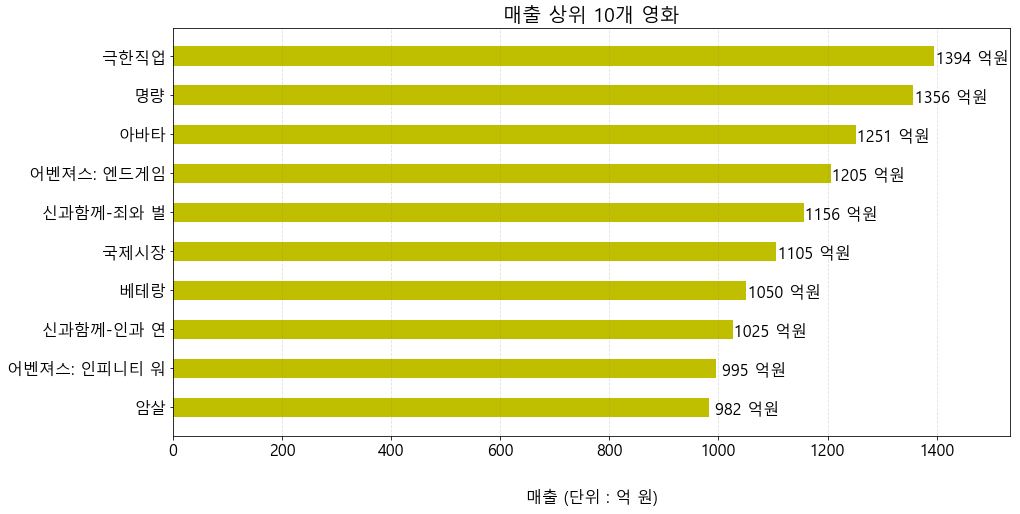

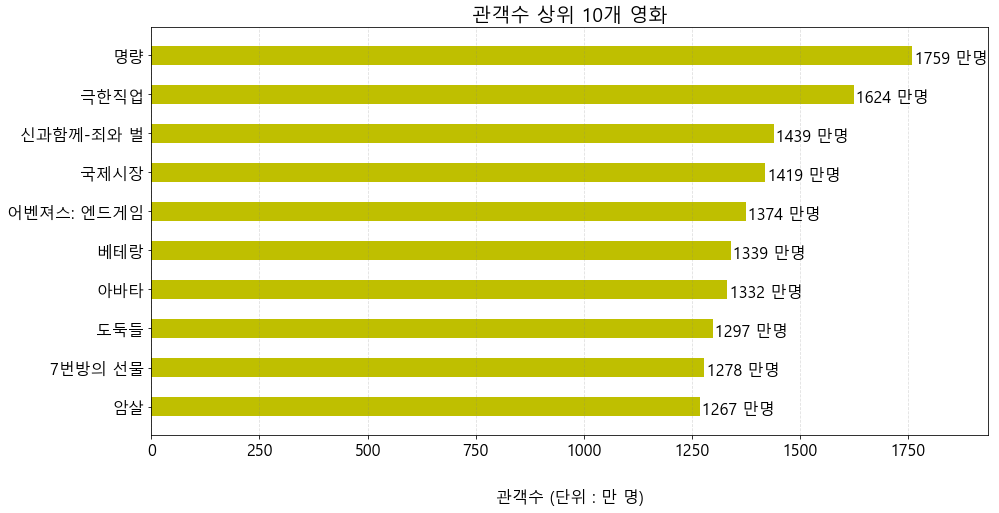

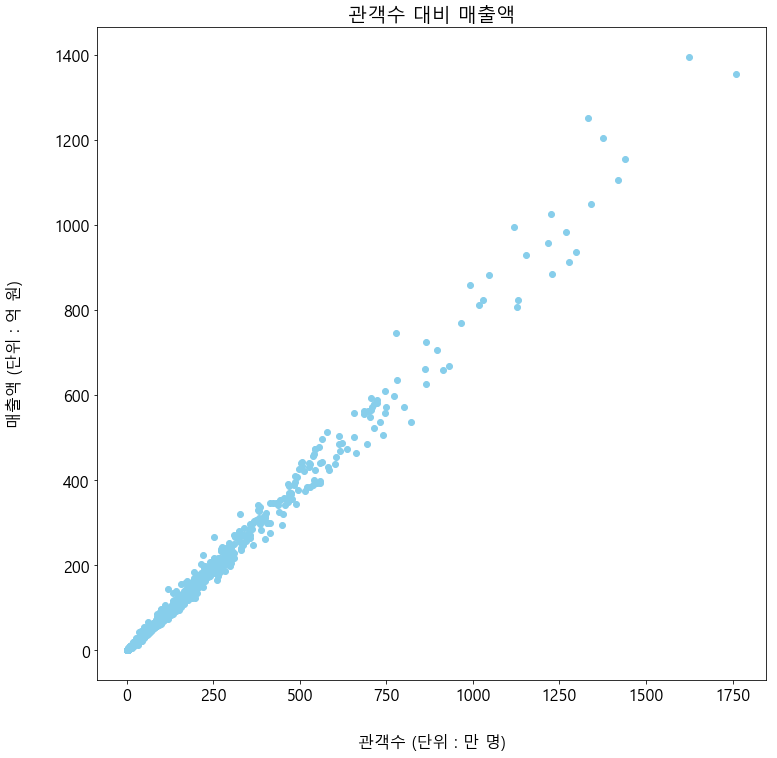

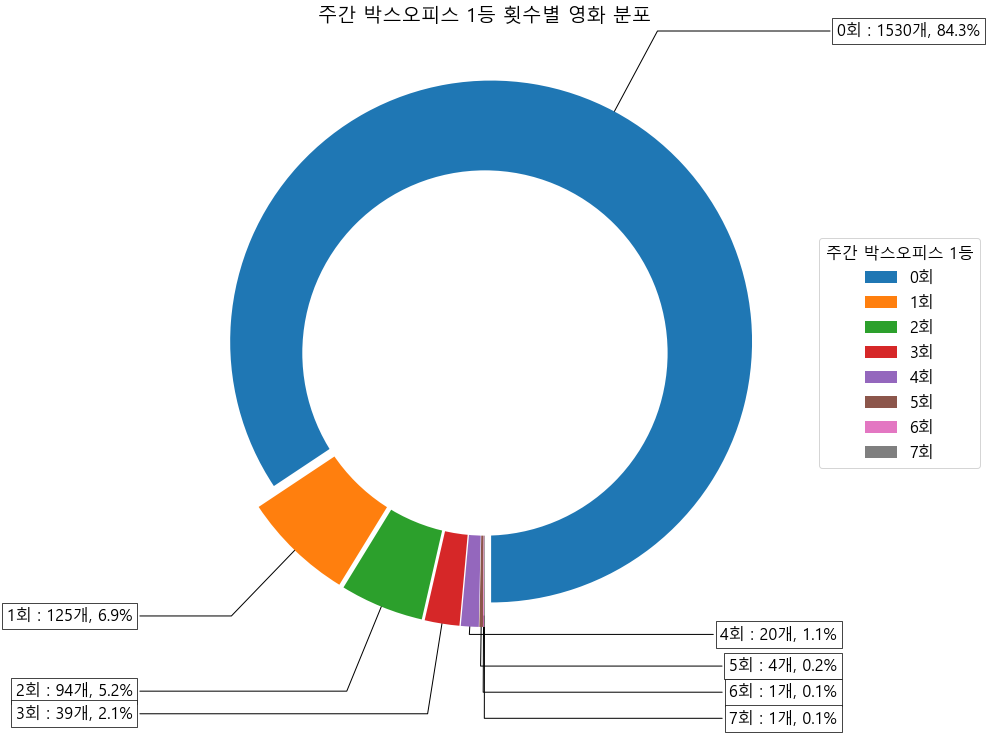

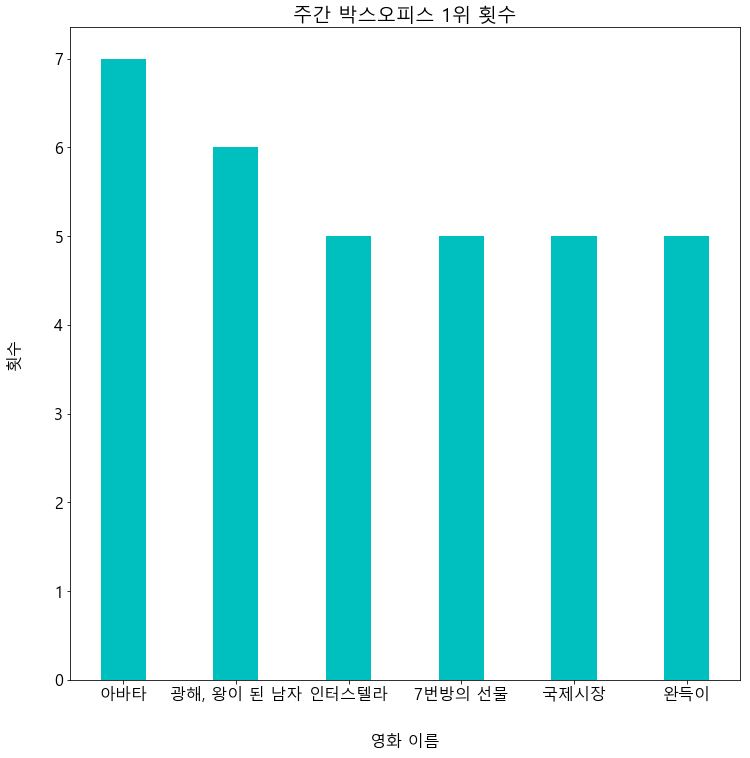

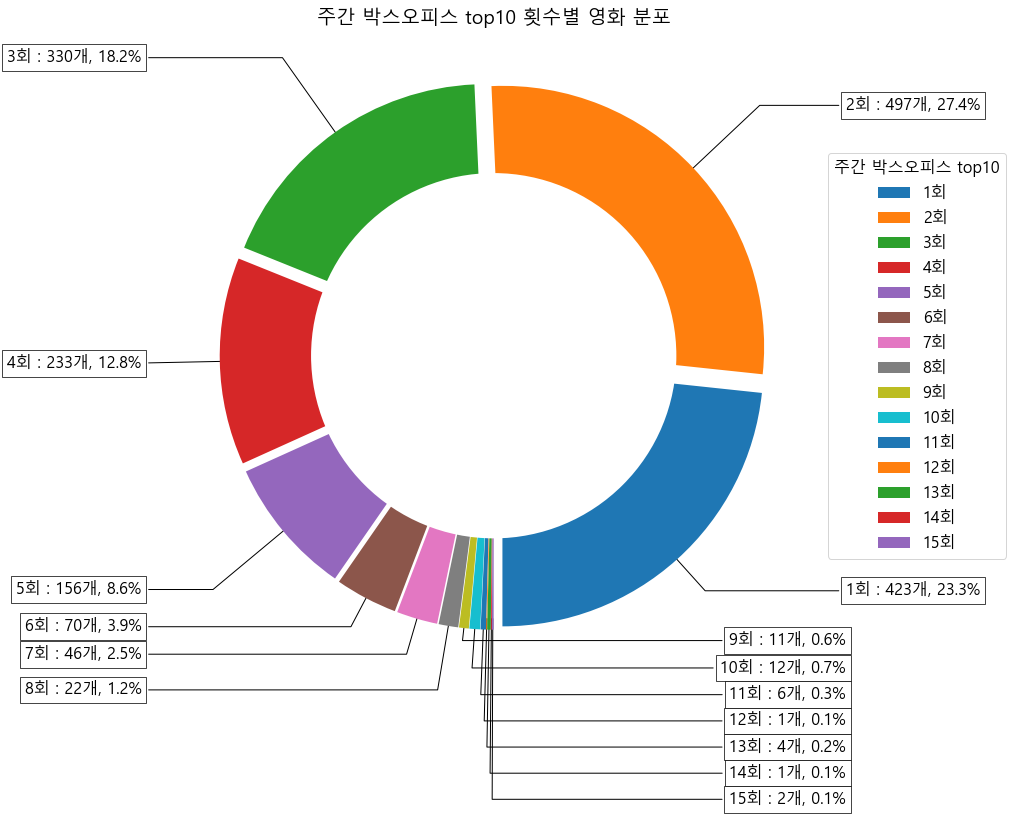

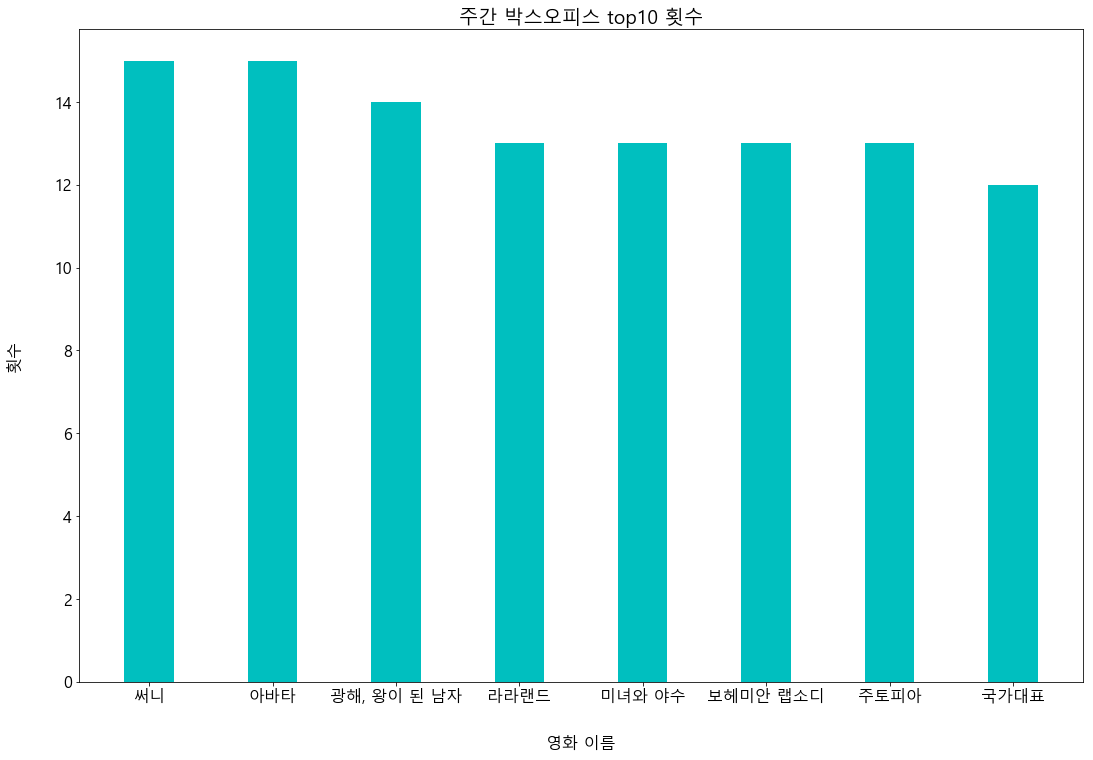

movie_cd.csv complete


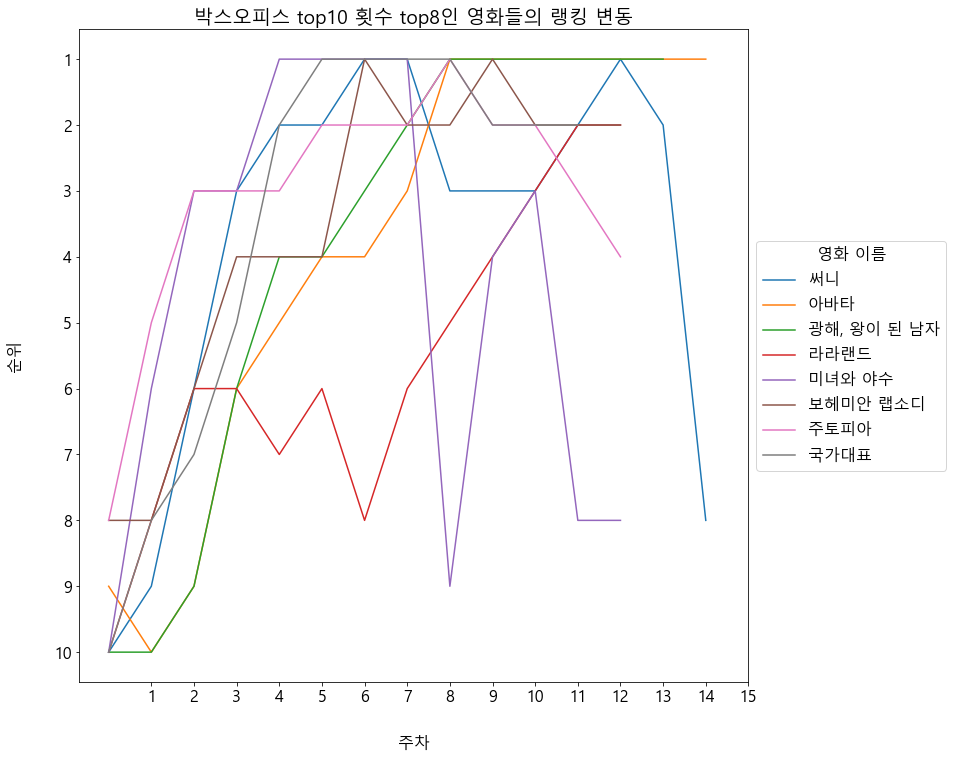

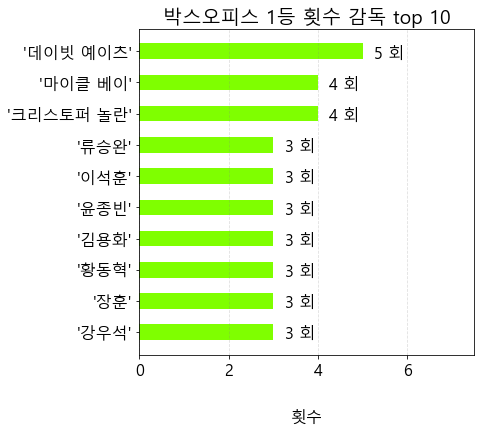

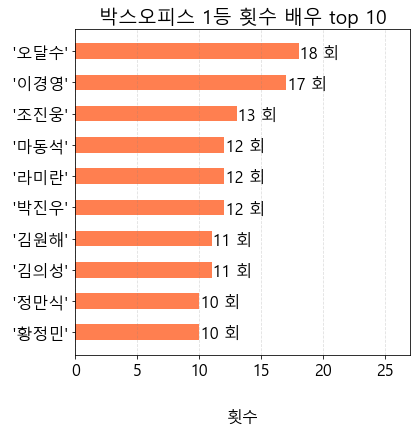

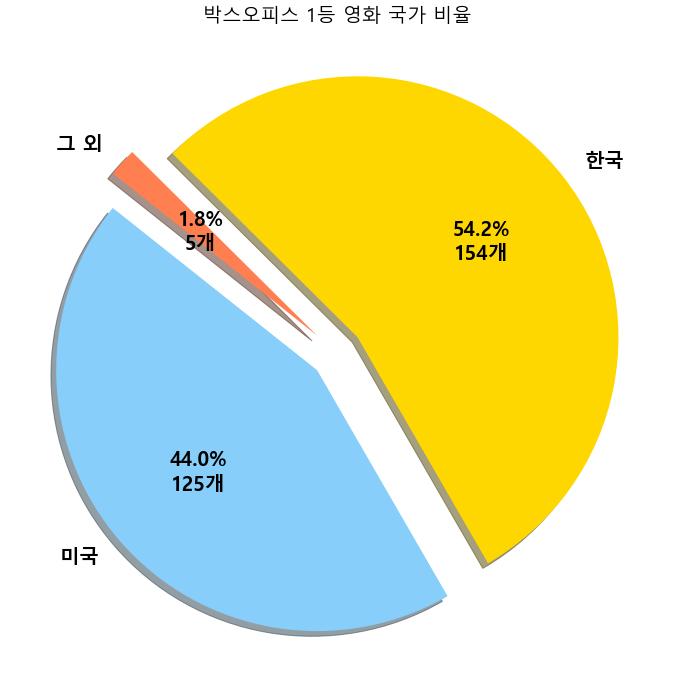

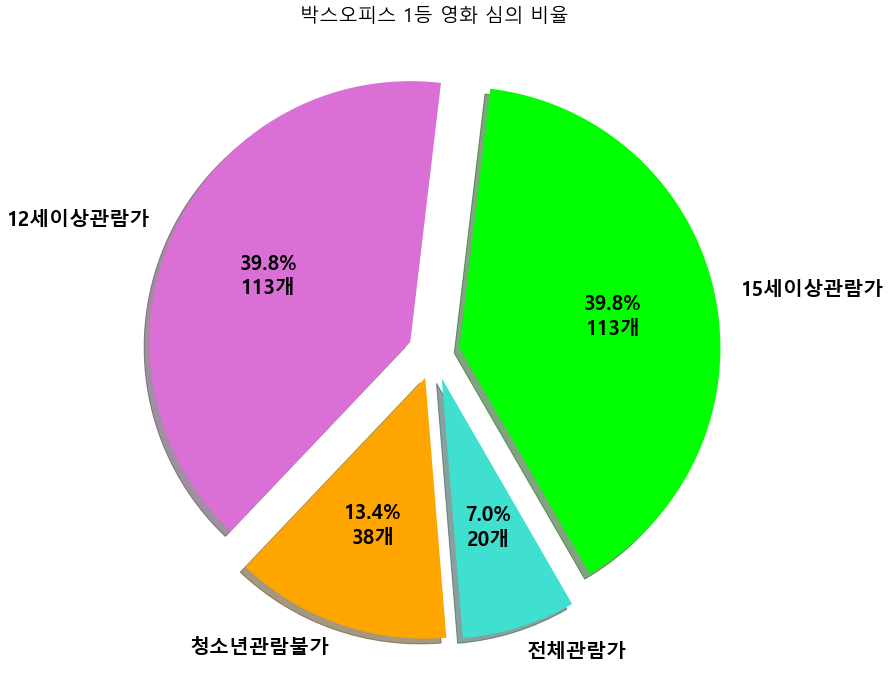

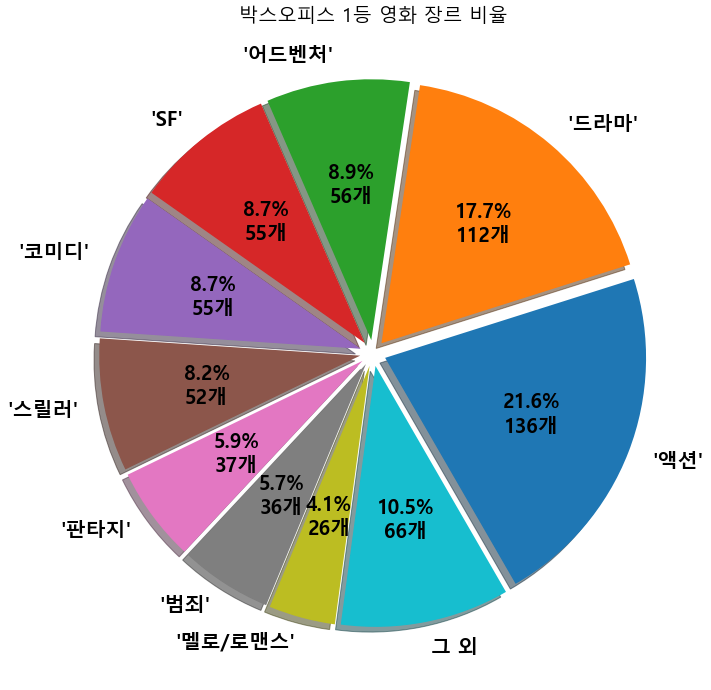

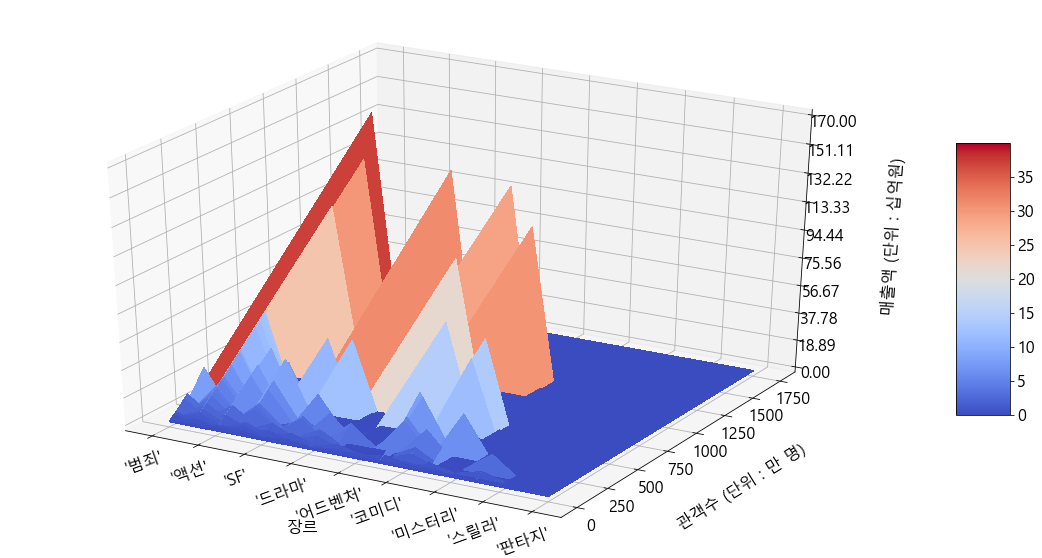



실행시간 :  6.793126693999966


In [20]:
%matplotlib inline
import pandas as pd
import matplotlib as mp1
import matplotlib.pyplot as plt
import numpy as np
import timeit
import movie_system
from math import floor

plt.rcParams['font.family'] = "Malgun Gothic"
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (14,4)

def checkTime(func):
    def new_func():
        start = timeit.default_timer()
        func()
        end = timeit.default_timer()
        print("\n\n실행시간 : ",end-start)
    return new_func

def sales_rank_graph(mv,pos):
    data = mv.sort_values(by='salesAcc',ascending=False).head(10)
    temp = list(data.salesAcc[::-1]/10**8)
    fig = plt.figure(figsize=(15,7.5))
    ax1 = fig.add_subplot(1,1,1)
    rects = ax1.barh(pos,data.salesAcc[::-1]/10**8,height=0.5,tick_label=data.movieNm[::-1],color = 'y')
    ax1.set_xlim([0,data.salesAcc.max()*1.1/10**8])
    ax1.set_title("매출 상위 10개 영화")
    ax1.set_xlabel("매출 (단위 : 억 원)")
    for i, rect in enumerate(rects):
        ax1.text(rect.get_width()+70 , i-0.7+ rect.get_height(),"{} 억원".format(floor(temp[i])) , ha='center')
    ax1.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)
    
def audience_rank_graph(mv,pos):
    data = mv.sort_values(by='audiAcc',ascending=False).head(10)
    temp = list(data.audiAcc[::-1]/10**4)
    fig = plt.figure(figsize=(15,7.5))
    ax2 = fig.add_subplot(1,1,1)
    rects = ax2.barh(pos,data.audiAcc[::-1]/10**4,height=0.5,tick_label=data.movieNm[::-1],color='y')
    ax2.set_xlim([0,data.audiAcc.max()*1.1/10**4])
    ax2.set_title("관객수 상위 10개 영화")
    ax2.set_xlabel("관객수 (단위 : 만 명)")
    for i, rect in enumerate(rects):
        ax2.text(rect.get_width()+90 , i-0.7+ rect.get_height(),"{} 만명".format(floor(temp[i])) , ha='center')
    ax2.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

def audience_sales_scatter(mv):
    fig = plt.figure(figsize=(12,12))
    plt.scatter(mv.audiAcc/10**4,mv.salesAcc/10**8,color='skyblue')
    plt.title("관객수 대비 매출액")
    plt.xlabel("관객수 (단위 : 만 명)")
    plt.ylabel("매출액 (단위 : 억 원)")

def save_cd(movie_name,mv):
    df = pd.DataFrame(movie_name.items())
    df = df.where(df[1]>0).dropna()
    temp = mv[['movieNm','movieCd']]
    df2 = pd.DataFrame(temp)
    df2 = df2.rename(columns = {'movieNm': 0})
    df2 = df2.rename(columns = {'movieCd': 1})
    df3 = pd.merge(df,df2,on=0)
    df3 = df3.drop_duplicates(0)
    return list(df3['1_y'])
    
    

@checkTime
def program():
    try :
        mv = pd.read_csv('movie.csv',encoding='ms949')
    except FileNotFoundError:
        print("File is not exist")
    else:
        #rank point 등록
        ms = movie_system.System()
        ms.rank_point(mv)
        
        
        mv = mv.drop_duplicates('movieNm')
        pos = np.arange(10)
        
        # 매출액 그래프
        sales_rank_graph(mv,pos)
        
        #관객수 그래프
        audience_rank_graph(mv,pos)
        
        #관객수 대비 매출액 scatter
        audience_sales_scatter(mv)
        plt.show()
        
        #주간 박스오피스 1등 횟수 순위
        ms.print_rank1()
        
        #주간 박스오피스 top10 횟수 순위
        ms.print_rank10()
        
        # 주간 박스오피스 top10 횟수 top8의 영화들의 rank 변동
        ms.print_rank_change()
        
        # 주간 박스오피스 1등을 했던 영화들의 영화코드 뽑아내기
        
        movie_name = {}
        movie_name = ms.rank1_data()
        movie_cd = save_cd(movie_name,mv)
        movie_cd = pd.DataFrame(movie_cd, columns=['movie_Cd'])
        movie_cd.to_csv("movie_cd.csv", index=False,encoding='ms949')
        print("movie_cd.csv complete")
        
        # 영화 정보 긁어오기
        try:
            mv_info = pd.read_csv('movie_info.csv',encoding='ms949')
        except FileNotFoundError:
            print("Make movie_info.csv first / read above comment")
        else:
            
            # 데이터 저장
            ms.update_movie_info(mv_info)
            
            # 주간 박스오피스 1위 횟수 감독 top10
            ms.print_director()
            
            # 주간 박스오피스 1위 횟수 배우 top10
            ms.print_actor()
            
            # 주간 박스오피스 1위 횟수 국가 비율
            ms.print_nation()
            
            # 주간 박스오피스 1위 횟수 심의 비율
            ms.print_audits()
            
            # 주간 박스오피스 1위 횟수 장르 비율
            ms.print_genre()
            
            
            # 심의정보 / 장르 / 매출액 3D 그래프
            ms.print_3D_graph(mv,mv_info)
            
            # 
            

if __name__ == "__main__":
    program()
